In [4]:
import yfinance as yf
import pandas as pd
import os

In [6]:
if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")

In [7]:
sp500.index = pd.to_datetime(sp500.index)

In [38]:
sp500

Open         High          Low        Close      Volume  \
Date                                                                         
1993-12-14   465.730011   466.119995   462.459991   463.059998   275050000   
1993-12-15   463.059998   463.690002   461.839996   461.839996   331770000   
1993-12-16   461.859985   463.980011   461.859985   463.339996   284620000   
1993-12-17   463.339996   466.380005   463.339996   466.380005   363750000   
1993-12-20   466.380005   466.899994   465.529999   465.850006   255900000   
...                 ...          ...          ...          ...         ...   
2022-05-09  4081.270020  4081.270020  3975.479980  3991.239990  4746120000   
2022-05-10  4035.179932  4068.820068  3958.169922  4001.050049  4630150000   
2022-05-11  3990.080078  4049.090088  3928.820068  3935.179932  4683220000   
2022-05-12  3903.949951  3964.800049  3858.870117  3930.080078  4964130000   
2022-05-13  3963.899902  4038.879883  3963.899902  4023.889893  4142950000   

               Tomorrow  Target  Close_Ratio_2  Trend_2  Close_Ratio_5  \
Date                                                                     
1993-12-14   461.839996       0       0.997157      1.0       0.996617   
1993-12-15   463.339996       1       0.998681      0.0       0.995899   
1993-12-16   466.380005       1       1.001621      1.0       0.999495   
1993-12-17   465.850006       0       1.003270      2.0       1.004991   
1993-12-20   465.299988       0       0.999431      1.0       1.003784   
...                 ...     ...            ...      ...            ...   
2022-05-09  4001.050049       1       0.983721      0.0       0.962343   
2022-05-10  3935.179932       0       1.001227      1.0       0.972892   
2022-05-11  3930.080078       0       0.991700      1.0       0.974166   
2022-05-12  4023.889893       1       0.999352      0.0       0.983460   
2022-05-13  4008.010010       0       1.011794      1.0       1.011971   

            Trend_5  Close_Ratio_60  Trend_60  Close_Ratio_250  Trend_250  \
Date                                                                        
1993-12-14      1.0        1.000283      32.0         1.028047      127.0   
1993-12-15      1.0        0.997329      32.0         1.025151      126.0   
1993-12-16      2.0        1.000311      32.0         1.028274      127.0   
1993-12-17      3.0        1.006561      32.0         1.034781      128.0   
1993-12-20      2.0        1.005120      32.0         1.033359      128.0   
...             ...             ...       ...              ...        ...   
2022-05-09      2.0        0.914756      26.0         0.898738      132.0   
2022-05-10      2.0        0.918469      27.0         0.901037      132.0   
2022-05-11      1.0        0.904963      27.0         0.886394      131.0   
2022-05-12      1.0        0.905668      26.0         0.885431      131.0   
2022-05-13      2.0        0.928896      26.0         0.906651      132.0   

            Close_Ratio_1000  Trend_1000  
Date                                      
1993-12-14          1.176082       512.0  
1993-12-15          1.172676       512.0  
1993-12-16          1.176163       513.0  
1993-12-17          1.183537       514.0  
1993-12-20          1.181856       513.0  
...                      ...         ...  
2022-05-09          1.158960       553.0  
2022-05-10          1.161381       553.0  
2022-05-11          1.141860       553.0  
2022-05-12          1.139984       552.0  
2022-05-13          1.166756       553.0  

[7156 rows x 17 columns]

<AxesSubplot:xlabel='Date'>

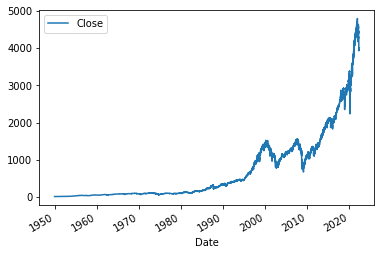

In [12]:
sp500.plot.line(y="Close", use_index=True)

In [13]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [14]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [15]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [16]:
sp500 = sp500.loc["1990-01-01":].copy()

In [17]:
sp500

Open         High          Low        Close      Volume  \
Date                                                                         
1990-01-02   353.399994   359.690002   351.980011   359.690002   162070000   
1990-01-03   359.690002   360.589996   357.890015   358.760010   192330000   
1990-01-04   358.760010   358.760010   352.890015   355.670013   177000000   
1990-01-05   355.670013   355.670013   351.350006   352.200012   158530000   
1990-01-08   352.200012   354.239990   350.540009   353.790009   140110000   
...                 ...          ...          ...          ...         ...   
2022-05-10  4035.179932  4068.820068  3958.169922  4001.050049  4630150000   
2022-05-11  3990.080078  4049.090088  3928.820068  3935.179932  4683220000   
2022-05-12  3903.949951  3964.800049  3858.870117  3930.080078  4964130000   
2022-05-13  3963.899902  4038.879883  3963.899902  4023.889893  4142950000   
2022-05-16  4013.020020  4046.459961  3983.989990  4008.010010  2203333000   

               Tomorrow  Target  
Date                             
1990-01-02   358.760010       0  
1990-01-03   355.670013       0  
1990-01-04   352.200012       0  
1990-01-05   353.790009       1  
1990-01-08   349.619995       0  
...                 ...     ...  
2022-05-10  3935.179932       0  
2022-05-11  3930.080078       0  
2022-05-12  4023.889893       1  
2022-05-13  4008.010010       0  
2022-05-16          NaN       0  

[8157 rows x 7 columns]

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [20]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.42857142857142855

<AxesSubplot:xlabel='Date'>

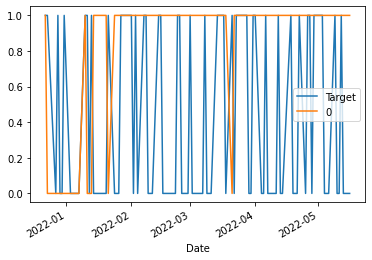

In [21]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [23]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [24]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [25]:
predictions = backtest(sp500, model, predictors)

In [26]:
predictions["Predictions"].value_counts()

0    3321
1    2336
Name: Predictions, dtype: int64

In [27]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5351027397260274

In [28]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.536857
0    0.463143
Name: Target, dtype: float64

In [29]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [30]:
sp500 = sp500.dropna()

In [31]:
sp500

Open         High          Low        Close      Volume  \
Date                                                                         
1993-12-14   465.730011   466.119995   462.459991   463.059998   275050000   
1993-12-15   463.059998   463.690002   461.839996   461.839996   331770000   
1993-12-16   461.859985   463.980011   461.859985   463.339996   284620000   
1993-12-17   463.339996   466.380005   463.339996   466.380005   363750000   
1993-12-20   466.380005   466.899994   465.529999   465.850006   255900000   
...                 ...          ...          ...          ...         ...   
2022-05-09  4081.270020  4081.270020  3975.479980  3991.239990  4746120000   
2022-05-10  4035.179932  4068.820068  3958.169922  4001.050049  4630150000   
2022-05-11  3990.080078  4049.090088  3928.820068  3935.179932  4683220000   
2022-05-12  3903.949951  3964.800049  3858.870117  3930.080078  4964130000   
2022-05-13  3963.899902  4038.879883  3963.899902  4023.889893  4142950000   

               Tomorrow  Target  Close_Ratio_2  Trend_2  Close_Ratio_5  \
Date                                                                     
1993-12-14   461.839996       0       0.997157      1.0       0.996617   
1993-12-15   463.339996       1       0.998681      0.0       0.995899   
1993-12-16   466.380005       1       1.001621      1.0       0.999495   
1993-12-17   465.850006       0       1.003270      2.0       1.004991   
1993-12-20   465.299988       0       0.999431      1.0       1.003784   
...                 ...     ...            ...      ...            ...   
2022-05-09  4001.050049       1       0.983721      0.0       0.962343   
2022-05-10  3935.179932       0       1.001227      1.0       0.972892   
2022-05-11  3930.080078       0       0.991700      1.0       0.974166   
2022-05-12  4023.889893       1       0.999352      0.0       0.983460   
2022-05-13  4008.010010       0       1.011794      1.0       1.011971   

            Trend_5  Close_Ratio_60  Trend_60  Close_Ratio_250  Trend_250  \
Date                                                                        
1993-12-14      1.0        1.000283      32.0         1.028047      127.0   
1993-12-15      1.0        0.997329      32.0         1.025151      126.0   
1993-12-16      2.0        1.000311      32.0         1.028274      127.0   
1993-12-17      3.0        1.006561      32.0         1.034781      128.0   
1993-12-20      2.0        1.005120      32.0         1.033359      128.0   
...             ...             ...       ...              ...        ...   
2022-05-09      2.0        0.914756      26.0         0.898738      132.0   
2022-05-10      2.0        0.918469      27.0         0.901037      132.0   
2022-05-11      1.0        0.904963      27.0         0.886394      131.0   
2022-05-12      1.0        0.905668      26.0         0.885431      131.0   
2022-05-13      2.0        0.928896      26.0         0.906651      132.0   

            Close_Ratio_1000  Trend_1000  
Date                                      
1993-12-14          1.176082       512.0  
1993-12-15          1.172676       512.0  
1993-12-16          1.176163       513.0  
1993-12-17          1.183537       514.0  
1993-12-20          1.181856       513.0  
...                      ...         ...  
2022-05-09          1.158960       553.0  
2022-05-10          1.161381       553.0  
2022-05-11          1.141860       553.0  
2022-05-12          1.139984       552.0  
2022-05-13          1.166756       553.0  

[7156 rows x 17 columns]

In [32]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [33]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [34]:
predictions = backtest(sp500, model, new_predictors)

In [35]:
predictions["Predictions"].value_counts()

0.0    3863
1.0     793
Name: Predictions, dtype: int64

In [36]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5737704918032787

In [39]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.54811
0    0.45189
Name: Target, dtype: float64